In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

import spatialize.gs.esi.aggfunction as af
from spatialize import logging
from spatialize.gs.esi import esi_griddata

In [3]:
#logging.log.setLevel("DEBUG")


def func(x, y):  # a kind of "cubic" function
    return x * (1 - x) * np.cos(4 * np.pi * x) * np.sin(4 * np.pi * y ** 2) ** 2


grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:, 0], points[:, 1])

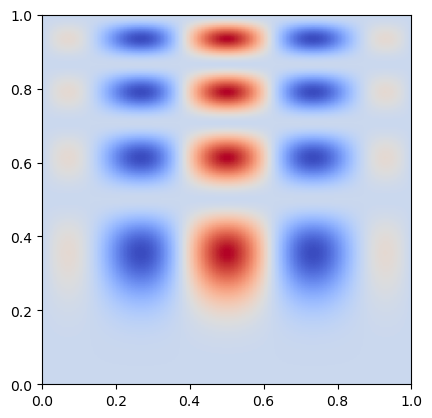

In [4]:
grid_cmap, prec_cmap = 'coolwarm', 'bwr'

plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin='lower', cmap=grid_cmap)
plt.show()

In [4]:
result = esi_griddata(points, values, (grid_x, grid_y),
                      local_interpolator="idw",
                      p_process="mondrian",
                      data_cond=False,
                      exponent=1.0,
                      n_partitions=500, alpha=0.985,
                      agg_function=af.mean
                      )



finished 100% of 500 iterations ... 

done (elpased time: 4.41s)


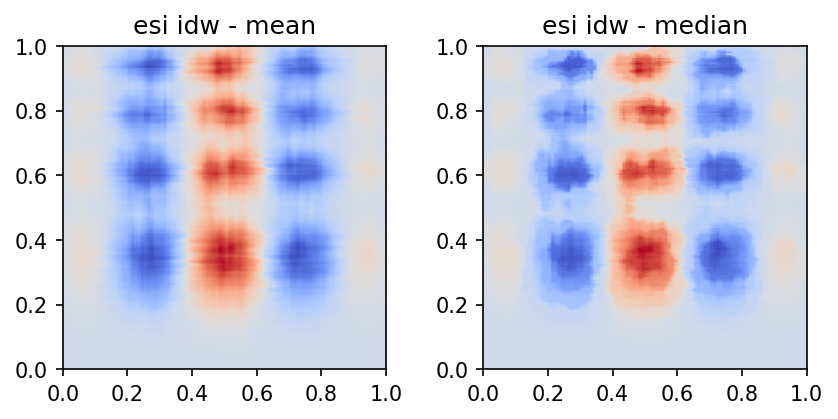

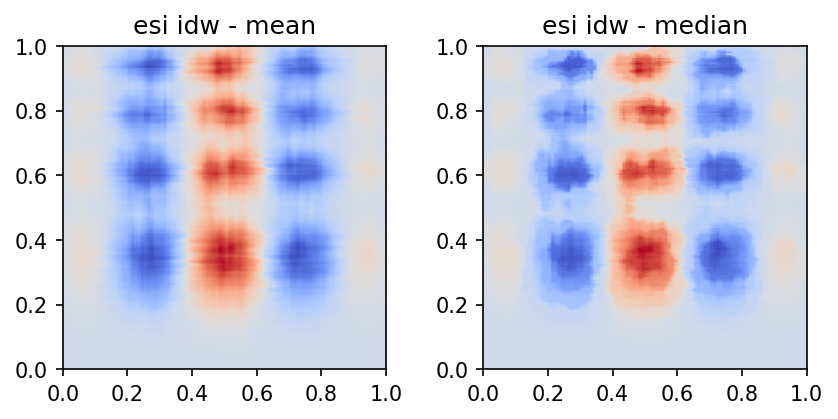

In [6]:
esi_idw_est = result.estimation()
esi_idw_est_2 = result.re_estimate(af.median)

fig = plt.figure(dpi=150)
gs = fig.add_gridspec(1, 2, wspace=0.3, hspace=0.47)
(ax1, ax2) = gs.subplots()

# plot original
ax1.imshow(esi_idw_est.T, extent=(0, 1, 0, 1), origin='lower', cmap=grid_cmap)
ax1.set_title("esi idw - mean")

ax2.imshow(esi_idw_est_2.T, extent=(0, 1, 0, 1), origin='lower', cmap=grid_cmap)
ax2.set_title("esi idw - median")

fig

In [7]:
result.esi_samples().shape

(100, 200, 500)